# **Import Libraries**

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [7]:
import numpy as np
print(np.__version__)

1.23.5


In [8]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


In [9]:
# Directories for training, validation, and testing
train_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\train'
val_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\val'
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'

In [10]:
# Image dimensions and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators for loading images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 12137 images belonging to 7 classes.
Found 3474 images belonging to 7 classes.
Found 1737 images belonging to 7 classes.


In [14]:
# Build the EfficientNet model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Adjust to 7 classes

model = Model(inputs=base_model.input, outputs=predictions)

In [15]:
# Compile the model with an initial learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [16]:
# Initial training of the model
history = model.fit(train_generator, 
                    validation_data=val_generator, 
                    epochs=10)

Epoch 1/10
759/759 [==============================] - 223s 283ms/step - loss: 0.8189 - accuracy: 0.7047 - val_loss: 7.2139 - val_accuracy: 0.1434
Epoch 2/10
759/759 [==============================] - 115s 151ms/step - loss: 0.4591 - accuracy: 0.8383 - val_loss: 5.4314 - val_accuracy: 0.1442
Epoch 3/10
759/759 [==============================] - 115s 151ms/step - loss: 0.3395 - accuracy: 0.8800 - val_loss: 5.4804 - val_accuracy: 0.1477
Epoch 4/10
759/759 [==============================] - 117s 155ms/step - loss: 0.2991 - accuracy: 0.8964 - val_loss: 7.5964 - val_accuracy: 0.1416
Epoch 5/10
759/759 [==============================] - 115s 152ms/step - loss: 0.2555 - accuracy: 0.9103 - val_loss: 4.1089 - val_accuracy: 0.1166
Epoch 6/10
759/759 [==============================] - 121s 160ms/step - loss: 0.2227 - accuracy: 0.9249 - val_loss: 4.8165 - val_accuracy: 0.1497
Epoch 7/10
759/759 [==============================] - 117s 154ms/step - loss: 0.1977 - accuracy: 0.9348 - val_loss: 5.0041 -

In [17]:
# Fine-tuning: Unfreeze some layers of the base model
base_model.trainable = True

# Compile the model again after unfreezing layers with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [18]:
# Continue training the model
history_fine_tune = model.fit(train_generator, 
                               validation_data=val_generator, 
                               epochs=10)


Epoch 1/10
759/759 [==============================] - 124s 154ms/step - loss: 0.0896 - accuracy: 0.9702 - val_loss: 0.2828 - val_accuracy: 0.9142
Epoch 2/10
759/759 [==============================] - 115s 151ms/step - loss: 0.0661 - accuracy: 0.9768 - val_loss: 0.2121 - val_accuracy: 0.9367
Epoch 3/10
759/759 [==============================] - 116s 152ms/step - loss: 0.0596 - accuracy: 0.9793 - val_loss: 0.2383 - val_accuracy: 0.9283
Epoch 4/10
759/759 [==============================] - 105s 138ms/step - loss: 0.0521 - accuracy: 0.9832 - val_loss: 0.2308 - val_accuracy: 0.9286
Epoch 5/10
759/759 [==============================] - 108s 143ms/step - loss: 0.0444 - accuracy: 0.9862 - val_loss: 0.1942 - val_accuracy: 0.9442
Epoch 6/10
759/759 [==============================] - 105s 139ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.2137 - val_accuracy: 0.9387
Epoch 7/10
759/759 [==============================] - 106s 140ms/step - loss: 0.0388 - accuracy: 0.9871 - val_loss: 0.2201 -

In [25]:
# Save the model weights
model.save('D:\\CADT\\CapstoneProjectI\\ml__model\\models\\efficientnetb0.h5')

TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [22]:
# Save the model weights
model.save_weights('D:\\CADT\\CapstoneProjectI\\ml__model\\models\\efficientnetb0_weights.h5')

In [26]:
# Rebuild the model architecture
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)  # Adjust to the number of classes

model = Model(inputs=base_model.input, outputs=predictions)

# Load the model weights
model.load_weights('D:\\CADT\\CapstoneProjectI\\ml__model\\models\\efficientnetb0_weights.h5')

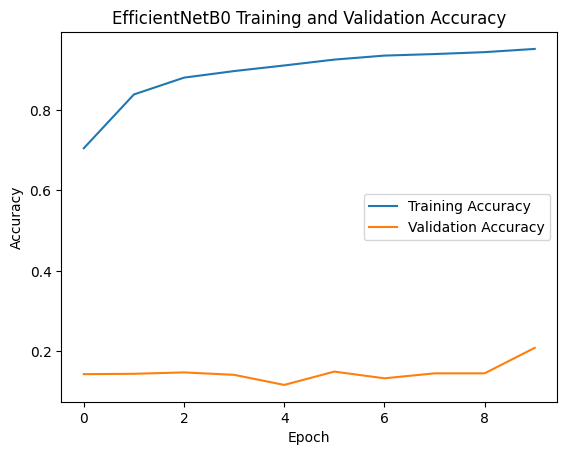

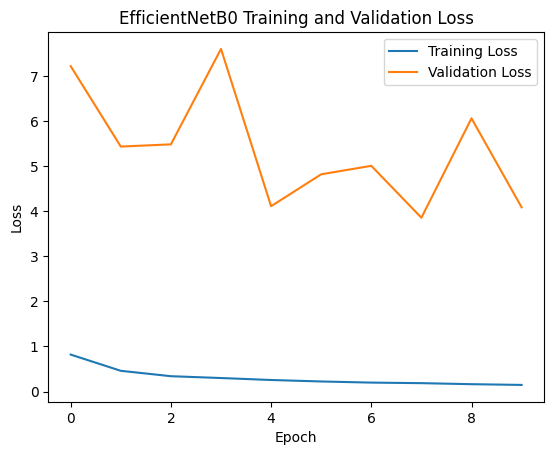

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNetB0 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('EfficientNetB0 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

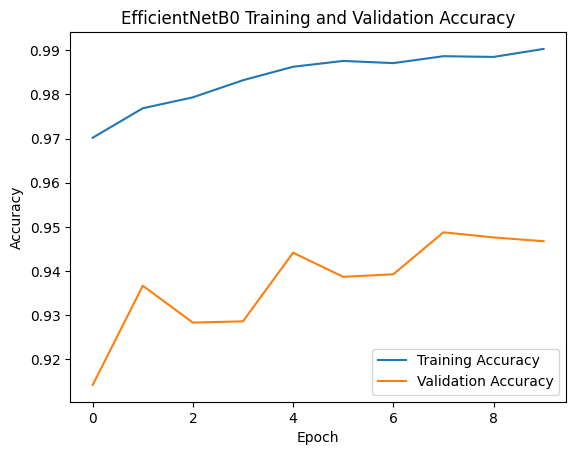

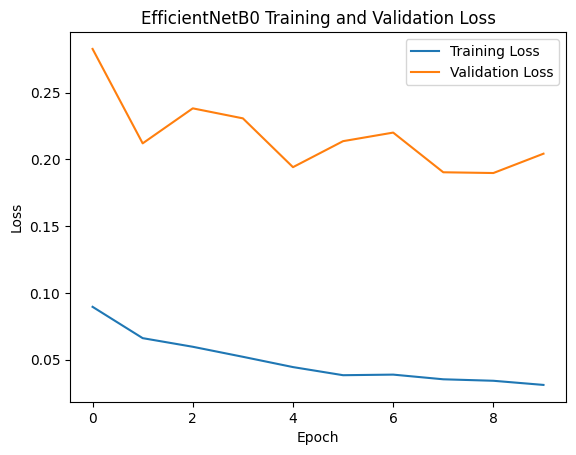

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_fine_tune.history['accuracy'], label='Training Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNetB0 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history_fine_tune.history['loss'], label='Training Loss')
plt.plot(history_fine_tune.history['val_loss'], label='Validation Loss')
plt.title('EfficientNetB0 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Found 1737 images belonging to 7 classes.
55/55 [==============================] - 27s 462ms/step


<Figure size 1000x800 with 0 Axes>

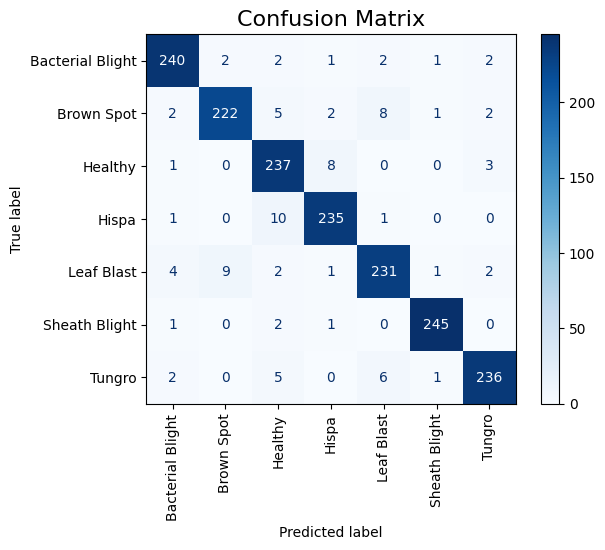

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test data
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct label ordering
)

# Get true labels from the 'test_ds' directory iterator
true_labels = test_ds.classes  # True labels

# Assuming 'model' is already trained
pred_probs = model.predict(test_ds)
pred_labels = np.argmax(pred_probs, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display the confusion matrix
class_labels = list(test_ds.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Confusion Matrix', fontsize=16)
plt.show()

Found 1737 images belonging to 7 classes.
55/55 [==============================] - 12s 220ms/step


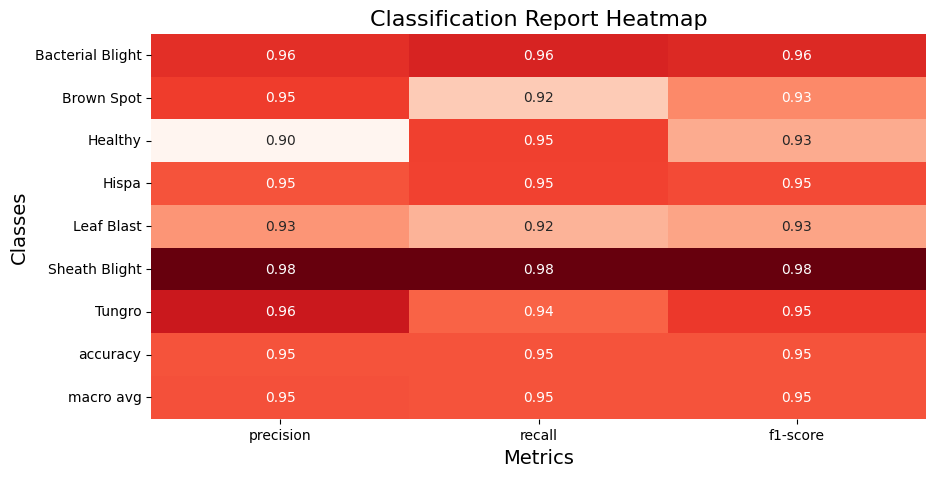

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test data
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct label ordering
)

# Get true labels from the 'test_ds' directory iterator
true_labels = test_ds.classes  # True labels

# Assuming 'model' is already trained
pred_probs = model.predict(test_ds)
pred_labels = np.argmax(pred_probs, axis=1)  # Convert probabilities to class labels

# Generate a classification report
report = classification_report(true_labels, pred_labels, target_names=list(test_ds.class_indices.keys()), output_dict=True)

# Convert the report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=plt.cm.Reds, fmt=".2f", cbar=False)
plt.title('Classification Report Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.show()